# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)
Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

[1.09934283 0.97234714 1.12953771]


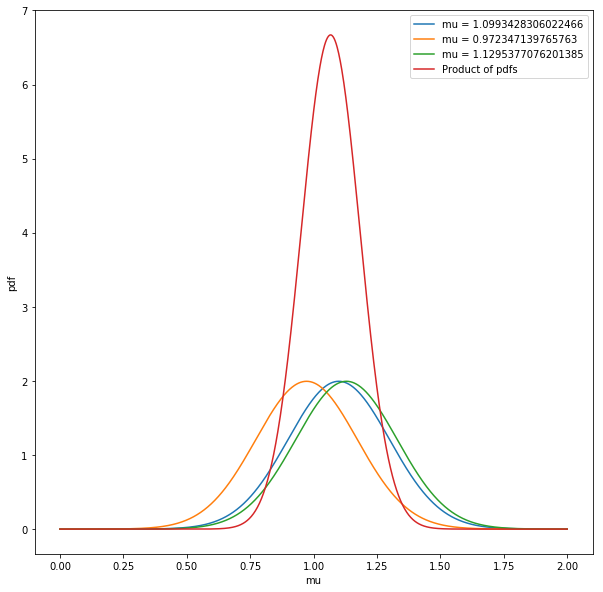

In [116]:
#Problem 2

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
plt.figure(figsize=(10,10))
np.random.seed(42)
N = 3
mu = 1.0
sigma = 0.2
sample = norm(mu,sigma).rvs(N, random_state=42)
print(sample)
#reducedsample = sample[sample>=1.1]
Ltotal = []
muGrid = np.linspace(0,2,1000)
Ltotal = np.full(shape=muGrid.shape, fill_value=1)
for i in range(len(sample)):
    L = norm.pdf(muGrid, loc=sample[i], scale=sigma)
    plt.plot(muGrid, L, ls='-', label='mu = ' + str(sample[i]))
    Ltotal = Ltotal*L
plt.plot(muGrid, Ltotal, ls='-', label='Product of pdfs')
plt.xlabel('mu')
plt.ylabel('pdf')
plt.legend(loc=1)


[1.09934283 0.97234714 1.12953771 1.30460597 0.95316933 0.95317261
 1.31584256 1.15348695 0.90610512 1.10851201]
[1.12953771 1.30460597 1.31584256 1.15348695 1.10851201]


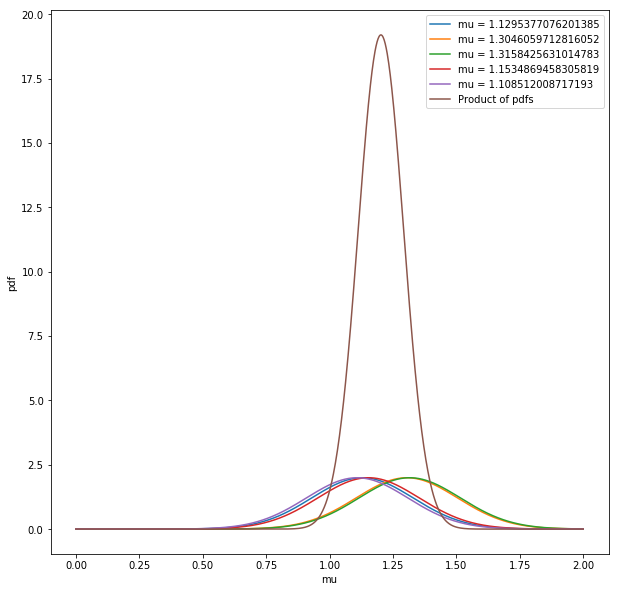

In [121]:
plt.figure(figsize=(10,10))
np.random.seed(42)
N = 10 #ten samples
mu = 1.0
sigma = 0.2
sample = norm(mu,sigma).rvs(N, random_state=42)
print(sample)
reducedsample = sample[sample>=1.1] #remove all below 1.1
print reducedsample
Ltotal = []
muGrid = np.linspace(0,2,1000)
Ltotal = np.full(shape=muGrid.shape, fill_value=1)
#for each mu in our reduced sample, plot a guassian and multiply into the product
for i in range(len(reducedsample)):
    L = norm.pdf(muGrid, loc=reducedsample[i], scale=sigma)
    plt.plot(muGrid, L, ls='-', label='mu = ' + str(reducedsample[i]))
    Ltotal = Ltotal*L
plt.plot(muGrid, Ltotal, ls='-', label='Product of pdfs')
plt.xlabel('mu')
plt.ylabel('pdf')
plt.legend()

In [105]:

#0 is clear, 1 is cloudy
#number of days
days = 10001
#initialize arrays for 
weather = []
probonday = []
startingweather = 0
startingprob = 0
weather = np.append(weather, startingweather)
probonday = np.append(probonday, startingprob)
np.random.seed(42)
i = 0
while i < days:
    #propose a change based on the prior probability
    if weather[-1] == 0:
        proposedweather = np.random.choice([0,1],p=[0.9, 0.1])
        newweather = np.append(weather, proposedweather)

    if weather[-1] == 1:
        proposedweather = np.random.choice([0,1],p=[0.5, 0.5])
        newweather = np.append(weather, proposedweather)
    
    weather = newweather
    newprob = float(len(weather[weather==0]))/float(len(weather))
    probonday = np.append(probonday, newprob)
    i += 1

[0.83168317 0.83333333 0.83495146 ... 0.84118412 0.8412     0.84121588]
[0.         1.         0.66666667 ... 0.84118412 0.8412     0.84121588]
0.8412158784121588
The Probability of a clear day is 0.8412158784121588


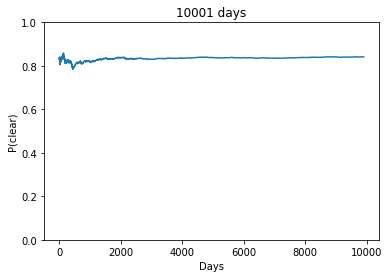

In [103]:
#remove 100 days of burn in
probnoburnin = probonday[100:]
print probnoburnin
print probonday
xgrid = np.arange(len(probnoburnin))
print(probnoburnin[-1])
plt.plot(xgrid, probnoburnin)
plt.xlabel('Days')
plt.ylabel('P(clear)')
plt.ylim(0,1)
plt.title(str(len(probonday)) +  ' days')
print('The Probability of a clear day is ' + str(probnoburnin[-1]))

[0.83168317 0.83333333 0.83495146 ... 0.8412     0.84121588 0.84123175]
[0.         1.         0.66666667 ... 0.8412     0.84121588 0.84123175]
The probability of a clear day is 0.8412317536492702


Text(0.5,1,'10002 days')

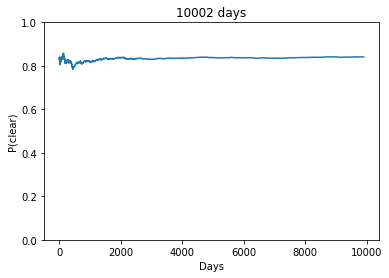

In [106]:
#remove 100 days of burn in
probnoburnin = probonday[100:]
print probnoburnin
print probonday
xgrid = np.arange(len(probnoburnin))
print('The probability of a clear day is ' + str(probnoburnin[-1]))
plt.plot(xgrid, probnoburnin)
plt.xlabel('Days')
plt.ylabel('P(clear)')
plt.ylim(0,1)
plt.title(str(len(probonday)) +  ' days')

Text(0,0.5,'Number of days')

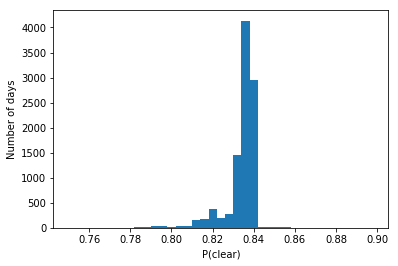

In [107]:
plt.hist(probonday, bins=np.arange(0.75,0.9,(0.9/0.75)/300))
plt.xlabel('P(clear)')
plt.ylabel('Number of days')